In [ ]:
import torch
import torch.nn as nn
import numpy as np

## Softmax Function

The Softmax Function squishes all the values of the nodes between 0 and 1. The formula is -
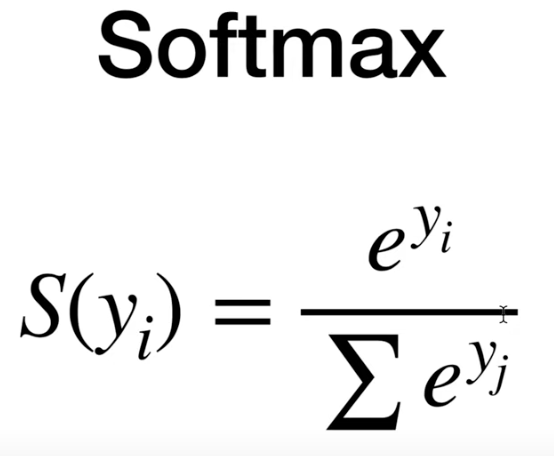

### Implementing in NumPy

In [ ]:
def softmax(x):
  return np.exp(x) / np.sum(np.exp(x), axis=0)

In [ ]:
x = np.array([2.0, 1.0, 0.1])
outputs = softmax(x)
print('softmax numpy: ', outputs)
print('the sum of all outputs is: ', np.sum(outputs))

softmax numpy:  [0.65900114 0.24243297 0.09856589]
the sum of all outputs is:  1.0


### Implementing in PyTorch

In [ ]:
x = torch.tensor([2.0, 1.0, 0.1])
outputs = torch.softmax(x, dim=0)
print('softmax numpy: ', outputs)
print('the sum of all outputs is: ', torch.sum(outputs).item())

softmax numpy:  tensor([0.6590, 0.2424, 0.0986])
the sum of all outputs is:  1.0000001192092896


## Cross Entropy Loss

### NumPy Implementation



In [9]:
import torch
import torch.nn as nn
import numpy as np

In [10]:
def cross_entropy(actual, predicted):
  loss = -np.sum(actual * np.log(predicted))
  return loss

In [11]:
# y must be one hot encoded
Y = np.array([1, 0, 0]) # lets assume this is our original class.

# y_pred contains probabilities saying that it belongs to a particular class.
Y_pred_good = np.array([0.7, .2, .1])
Y_pred_bad = np.array([.1, .3, .6])
l_good = cross_entropy(Y, Y_pred_good)
l_bad = cross_entropy(Y, Y_pred_bad)
print(f'Loss for Good Predictions: {l_good:.4f}')
print(f'Loss for Bad Predictions: {l_bad:.4f}')

Loss for Good Predictions: 0.3567
Loss for Bad Predictions: 2.3026


## PyTorch Implementation -

In PyTorch, ```nn.CrossEntropyLoss``` applies ```nn.LogSoftmax``` and ```nn.NLLLoss``` (negative likelihood loss)

So, we dont have to apply softmax in the last layer before applying cross entropy.

Another thing to note is that PyTorch does not need one hot encoded Y. It needs class labels in Y.

y_pred has raw scores (logits) no softmax here.

In [12]:
import torch
import torch.nn as nn
import numpy as np

In [13]:
loss = nn.CrossEntropyLoss()

In [14]:
# y contains the label of the class. Here, 0 means the first class.
Y = torch.tensor([0])
# nsamples x nclasses = 1x3
Y_pred_good = torch.tensor([[2.0, 1.0, 0.1]]) # these are raw values, we didnt apply softmax
Y_pred_bad = torch.tensor([[0.5, 2.0, 0.3]])  # the probabilities of each index is the probability of being that class.

In [15]:
l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)

print(f'Loss for good predictions: {l1.item():.4f}')
print(f'Loss for bad predictions: {l2.item():.4f}')

Loss for good predictions: 0.4170
Loss for bad predictions: 1.8406


```torch.max(input)``` returns the maximum value of all elements in the input tensor.

```torch.max(input, dim)``` returns a namedtuple (values, indices) where 'values' is the maximum value of each row of the 'input' tensor in the given dimension 'dim'. And 'indices' is the index location of each maximum value found (argmax).

In [16]:
# Displaying what our model predicted.
_, predictions1 = torch.max(Y_pred_good, 1)
_, predictions2 = torch.max(Y_pred_bad, 1)

print(predictions1)
print(predictions2)

tensor([0])
tensor([1])


PyTorch loss has support for multiple samples too, so, we calculate loss simultaneously for more than 1 sample.

In [17]:
# 3 samples.
Y = torch.tensor([2, 0, 1])
# nsamples x nclasses = 3x3
Y_pred_good = torch.tensor([[.1, 1.0, 2.1], [2.0, 1.0, 0.1], [.1, 3.0, 0.1]])
Y_pred_bad = torch.tensor([[0.5, 2.0, 0.3], [0.5, 2.0, 0.3], [1.5, 1.0, 2.3]])

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)

print(f'Loss for good predictions: {l1.item():.4f}')
print(f'Loss for bad predictions: {l2.item():.4f}')

_, predictions1 = torch.max(Y_pred_good, 1)
_, predictions2 = torch.max(Y_pred_bad, 1)

print(predictions1)
print(predictions2)

Loss for good predictions: 0.3018
Loss for bad predictions: 1.9082
tensor([2, 0, 1])
tensor([1, 1, 2])
